## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.25,0.5,0.75]
redice_lr_patient = [1,5,10]

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
import itertools
from keras.callbacks import ReduceLROnPlateau
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    


    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.25, reduce_patient: 1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply (TFOpLambda (None, 512)               0         
_________________________________________________________________
tf.__operators__.add (TFOpLa (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_1 (TFOpLamb (None, 256)               0         
_________________________________________________________________
tf.

49/49 [==============================] - 2s 37ms/step - loss: 1.7653 - accuracy: 0.3836 - val_loss: 1.7577 - val_accuracy: 0.3840
Epoch 8/25
49/49 [==============================] - 2s 44ms/step - loss: 1.7418 - accuracy: 0.3914 - val_loss: 1.7378 - val_accuracy: 0.3866
Epoch 9/25
49/49 [==============================] - 2s 39ms/step - loss: 1.7199 - accuracy: 0.3994 - val_loss: 1.7180 - val_accuracy: 0.3942
Epoch 10/25
49/49 [==============================] - 2s 42ms/step - loss: 1.7011 - accuracy: 0.4044 - val_loss: 1.6965 - val_accuracy: 0.4045
Epoch 11/25
49/49 [==============================] - 2s 44ms/step - loss: 1.6832 - accuracy: 0.4105 - val_loss: 1.6812 - val_accuracy: 0.4085
Epoch 12/25
49/49 [==============================] - 2s 39ms/step - loss: 1.6672 - accuracy: 0.4166 - val_loss: 1.6670 - val_accuracy: 0.4135
Epoch 13/25
49/49 [==============================] - 2s 39ms/step - loss: 1.6526 - accuracy: 0.4212 - val_loss: 1.6534 - val_accuracy: 0.4171
Epoch 14/25
49/49 [=

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply_9 (TFOpLamb (None, 512)               0         
_________________________________________________________________
tf.__operators__.add_9 (TFOp (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.math.multiply_10 (TFOpLam (None, 256)               0         
_________________________________________________________________
tf.__operators__.add_10 (TFO (None, 256)               0   

Epoch 8/25
49/49 [==============================] - 2s 33ms/step - loss: 1.7753 - accuracy: 0.3812 - val_loss: 1.7666 - val_accuracy: 0.3892
Epoch 9/25
49/49 [==============================] - 2s 33ms/step - loss: 1.7529 - accuracy: 0.3890 - val_loss: 1.7458 - val_accuracy: 0.3929
Epoch 10/25
49/49 [==============================] - 2s 31ms/step - loss: 1.7340 - accuracy: 0.3956 - val_loss: 1.7270 - val_accuracy: 0.4019
Epoch 11/25
49/49 [==============================] - 2s 33ms/step - loss: 1.7158 - accuracy: 0.4019 - val_loss: 1.7111 - val_accuracy: 0.4048
Epoch 12/25
49/49 [==============================] - 2s 34ms/step - loss: 1.7008 - accuracy: 0.4062 - val_loss: 1.6972 - val_accuracy: 0.4062
Epoch 13/25
49/49 [==============================] - 2s 35ms/step - loss: 1.6856 - accuracy: 0.4114 - val_loss: 1.6823 - val_accuracy: 0.4116
Epoch 14/25
49/49 [==============================] - 2s 34ms/step - loss: 1.6721 - accuracy: 0.4169 - val_loss: 1.6706 - val_accuracy: 0.4173
Epoch 15

_________________________________________________________________
tf.__operators__.add_19 (TFO (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
tf.math.multiply_20 (TFOpLam (None, 128)               0         
_________________________________________________________________
tf.__operators__.add_20 (TFO (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
49/49 [==============================] - 2s 35ms/step - loss: 2.2195 - accuracy: 0.1905 - val_loss: 2.1062 - val_accuracy: 0.2587
Epoch 2/25
49/49 [==============================] - 2s 35

49/49 [==============================] - 2s 32ms/step - loss: 1.6398 - accuracy: 0.4255 - val_loss: 1.6403 - val_accuracy: 0.4261
Epoch 15/25
49/49 [==============================] - 2s 34ms/step - loss: 1.6260 - accuracy: 0.4318 - val_loss: 1.6272 - val_accuracy: 0.4319
Epoch 16/25
49/49 [==============================] - 2s 34ms/step - loss: 1.6130 - accuracy: 0.4356 - val_loss: 1.6152 - val_accuracy: 0.4359
Epoch 17/25
49/49 [==============================] - 2s 33ms/step - loss: 1.6007 - accuracy: 0.4408 - val_loss: 1.6047 - val_accuracy: 0.4381
Epoch 18/25
49/49 [==============================] - 2s 33ms/step - loss: 1.5892 - accuracy: 0.4449 - val_loss: 1.5927 - val_accuracy: 0.4428
Epoch 19/25
49/49 [==============================] - 2s 36ms/step - loss: 1.5770 - accuracy: 0.4496 - val_loss: 1.5839 - val_accuracy: 0.4454
Epoch 20/25
49/49 [==============================] - 2s 39ms/step - loss: 1.5667 - accuracy: 0.4525 - val_loss: 1.5767 - val_accuracy: 0.4489
Epoch 21/25
49/49 

Epoch 1/25
49/49 [==============================] - 3s 48ms/step - loss: 2.1303 - accuracy: 0.2345 - val_loss: 1.9168 - val_accuracy: 0.3182
Epoch 2/25
49/49 [==============================] - 2s 42ms/step - loss: 1.8484 - accuracy: 0.3429 - val_loss: 1.7871 - val_accuracy: 0.3675
Epoch 3/25
49/49 [==============================] - 2s 40ms/step - loss: 1.7602 - accuracy: 0.3759 - val_loss: 1.7748 - val_accuracy: 0.3626
Epoch 4/25
49/49 [==============================] - 2s 38ms/step - loss: 1.6897 - accuracy: 0.4004 - val_loss: 1.6673 - val_accuracy: 0.4024
Epoch 5/25
49/49 [==============================] - 2s 36ms/step - loss: 1.6304 - accuracy: 0.4211 - val_loss: 1.6046 - val_accuracy: 0.4325
Epoch 6/25
49/49 [==============================] - 2s 39ms/step - loss: 1.5880 - accuracy: 0.4345 - val_loss: 1.5919 - val_accuracy: 0.4346
Epoch 7/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5616 - accuracy: 0.4460 - val_loss: 1.5410 - val_accuracy: 0.4535
Epoch 8/25
49

49/49 [==============================] - 2s 34ms/step - loss: 2.1767 - accuracy: 0.2381 - val_loss: 2.1752 - val_accuracy: 0.2451
Epoch 18/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1719 - accuracy: 0.2407 - val_loss: 2.1704 - val_accuracy: 0.2477
Epoch 19/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1672 - accuracy: 0.2436 - val_loss: 2.1657 - val_accuracy: 0.2494
Epoch 20/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1625 - accuracy: 0.2466 - val_loss: 2.1612 - val_accuracy: 0.2499
Epoch 21/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1580 - accuracy: 0.2489 - val_loss: 2.1568 - val_accuracy: 0.2512
Epoch 22/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1536 - accuracy: 0.2510 - val_loss: 2.1525 - val_accuracy: 0.2537
Epoch 23/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1493 - accuracy: 0.2533 - val_loss: 2.1484 - val_accuracy: 0.2553
Epoch 24/25
49/49 

Epoch 1/25
49/49 [==============================] - 2s 37ms/step - loss: 2.3482 - accuracy: 0.1042 - val_loss: 2.3218 - val_accuracy: 0.1163
Epoch 2/25
49/49 [==============================] - 2s 34ms/step - loss: 2.3048 - accuracy: 0.1206 - val_loss: 2.2950 - val_accuracy: 0.1266
Epoch 3/25
49/49 [==============================] - 2s 33ms/step - loss: 2.2834 - accuracy: 0.1319 - val_loss: 2.2773 - val_accuracy: 0.1382
Epoch 4/25
49/49 [==============================] - 2s 34ms/step - loss: 2.2682 - accuracy: 0.1431 - val_loss: 2.2638 - val_accuracy: 0.1503
Epoch 5/25
49/49 [==============================] - 2s 33ms/step - loss: 2.2560 - accuracy: 0.1546 - val_loss: 2.2527 - val_accuracy: 0.1602
Epoch 6/25
49/49 [==============================] - 2s 33ms/step - loss: 2.2458 - accuracy: 0.1650 - val_loss: 2.2432 - val_accuracy: 0.1693
Epoch 7/25
49/49 [==============================] - 2s 33ms/step - loss: 2.2369 - accuracy: 0.1754 - val_loss: 2.2349 - val_accuracy: 0.1780
Epoch 8/25
49

49/49 [==============================] - 2s 36ms/step - loss: 2.1957 - accuracy: 0.2398 - val_loss: 2.1912 - val_accuracy: 0.2432
Epoch 21/25
49/49 [==============================] - 2s 35ms/step - loss: 2.1920 - accuracy: 0.2421 - val_loss: 2.1876 - val_accuracy: 0.2446
Epoch 22/25
49/49 [==============================] - 2s 35ms/step - loss: 2.1885 - accuracy: 0.2445 - val_loss: 2.1841 - val_accuracy: 0.2459
Epoch 23/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1850 - accuracy: 0.2465 - val_loss: 2.1806 - val_accuracy: 0.2466
Epoch 24/25
49/49 [==============================] - 2s 35ms/step - loss: 2.1817 - accuracy: 0.2481 - val_loss: 2.1773 - val_accuracy: 0.2485
Epoch 25/25
49/49 [==============================] - 2s 34ms/step - loss: 2.1784 - accuracy: 0.2497 - val_loss: 2.1740 - val_accuracy: 0.2508
Numbers of exp: 14, reduce_factor: 0.50, reduce_patient: 10
Model: "model_14"
_________________________________________________________________
Layer (type)    

49/49 [==============================] - 2s 41ms/step - loss: 2.3279 - accuracy: 0.0992 - val_loss: 2.3009 - val_accuracy: 0.1095
Epoch 2/25
49/49 [==============================] - 2s 36ms/step - loss: 2.2846 - accuracy: 0.1316 - val_loss: 2.2757 - val_accuracy: 0.1438
Epoch 3/25
49/49 [==============================] - 2s 35ms/step - loss: 2.2654 - accuracy: 0.1554 - val_loss: 2.2601 - val_accuracy: 0.1593
Epoch 4/25
49/49 [==============================] - 2s 40ms/step - loss: 2.2522 - accuracy: 0.1700 - val_loss: 2.2483 - val_accuracy: 0.1735
Epoch 5/25
49/49 [==============================] - 2s 37ms/step - loss: 2.2417 - accuracy: 0.1841 - val_loss: 2.2385 - val_accuracy: 0.1857
Epoch 6/25
49/49 [==============================] - 2s 34ms/step - loss: 2.2328 - accuracy: 0.1939 - val_loss: 2.2301 - val_accuracy: 0.1943
Epoch 7/25
49/49 [==============================] - 2s 35ms/step - loss: 2.2250 - accuracy: 0.2030 - val_loss: 2.2225 - val_accuracy: 0.2023
Epoch 8/25
49/49 [======

Epoch 21/25
49/49 [==============================] - 2s 39ms/step - loss: 2.1597 - accuracy: 0.2202 - val_loss: 2.1602 - val_accuracy: 0.2225
Epoch 22/25
49/49 [==============================] - 2s 45ms/step - loss: 2.1556 - accuracy: 0.2224 - val_loss: 2.1562 - val_accuracy: 0.2243
Epoch 23/25
49/49 [==============================] - 2s 43ms/step - loss: 2.1517 - accuracy: 0.2254 - val_loss: 2.1524 - val_accuracy: 0.2274
Epoch 24/25
49/49 [==============================] - 2s 39ms/step - loss: 2.1479 - accuracy: 0.2278 - val_loss: 2.1486 - val_accuracy: 0.2289
Epoch 25/25
49/49 [==============================] - 2s 41ms/step - loss: 2.1442 - accuracy: 0.2296 - val_loss: 2.1450 - val_accuracy: 0.2319
Numbers of exp: 17, reduce_factor: 0.75, reduce_patient: 10
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3072)]            0         
______________

49/49 [==============================] - 2s 49ms/step - loss: 2.1652 - accuracy: 0.2092 - val_loss: 2.1046 - val_accuracy: 0.2250
Epoch 3/25
49/49 [==============================] - 2s 49ms/step - loss: 2.0587 - accuracy: 0.2492 - val_loss: 2.0053 - val_accuracy: 0.2548
Epoch 4/25
49/49 [==============================] - 3s 56ms/step - loss: 1.9643 - accuracy: 0.2904 - val_loss: 1.8561 - val_accuracy: 0.3226
Epoch 5/25
49/49 [==============================] - 3s 55ms/step - loss: 1.9171 - accuracy: 0.3086 - val_loss: 1.8607 - val_accuracy: 0.3308

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/25
49/49 [==============================] - 2s 46ms/step - loss: 1.7234 - accuracy: 0.3849 - val_loss: 1.6825 - val_accuracy: 0.3993
Epoch 7/25
49/49 [==============================] - 2s 47ms/step - loss: 1.6861 - accuracy: 0.3982 - val_loss: 1.6625 - val_accuracy: 0.4075
Epoch 8/25
49/49 [==============================] - 3s 52ms/step - loss: 1.6571 - ac

49/49 [==============================] - 2s 41ms/step - loss: 1.6439 - accuracy: 0.4309 - val_loss: 1.6508 - val_accuracy: 0.4300
Epoch 21/25
49/49 [==============================] - 2s 44ms/step - loss: 1.6367 - accuracy: 0.4342 - val_loss: 1.6436 - val_accuracy: 0.4282
Epoch 22/25
49/49 [==============================] - 2s 41ms/step - loss: 1.6295 - accuracy: 0.4360 - val_loss: 1.6352 - val_accuracy: 0.4341
Epoch 23/25
49/49 [==============================] - 2s 41ms/step - loss: 1.6212 - accuracy: 0.4390 - val_loss: 1.6425 - val_accuracy: 0.4240
Epoch 24/25
49/49 [==============================] - 2s 43ms/step - loss: 1.6135 - accuracy: 0.4408 - val_loss: 1.6359 - val_accuracy: 0.4255
Epoch 25/25
49/49 [==============================] - 2s 41ms/step - loss: 1.6077 - accuracy: 0.4435 - val_loss: 1.6161 - val_accuracy: 0.4454
Numbers of exp: 20, reduce_factor: 0.25, reduce_patient: 10
Model: "model_20"
_________________________________________________________________
Layer (type)    

49/49 [==============================] - 3s 48ms/step - loss: 2.1663 - accuracy: 0.2292 - val_loss: 2.0820 - val_accuracy: 0.2564
Epoch 2/25
49/49 [==============================] - 2s 40ms/step - loss: 2.0317 - accuracy: 0.2898 - val_loss: 1.9916 - val_accuracy: 0.3043
Epoch 3/25
49/49 [==============================] - 2s 41ms/step - loss: 1.9598 - accuracy: 0.3185 - val_loss: 1.9328 - val_accuracy: 0.3359
Epoch 4/25
49/49 [==============================] - 2s 41ms/step - loss: 1.9110 - accuracy: 0.3391 - val_loss: 1.8950 - val_accuracy: 0.3393
Epoch 5/25
49/49 [==============================] - 2s 41ms/step - loss: 1.8748 - accuracy: 0.3510 - val_loss: 1.8618 - val_accuracy: 0.3539
Epoch 6/25
49/49 [==============================] - 2s 42ms/step - loss: 1.8463 - accuracy: 0.3600 - val_loss: 1.8367 - val_accuracy: 0.3654
Epoch 7/25
49/49 [==============================] - 2s 41ms/step - loss: 1.8225 - accuracy: 0.3678 - val_loss: 1.8179 - val_accuracy: 0.3660
Epoch 8/25
49/49 [======

49/49 [==============================] - 2s 40ms/step - loss: 1.7359 - accuracy: 0.4014 - val_loss: 1.7376 - val_accuracy: 0.4009
Epoch 21/25
49/49 [==============================] - 2s 41ms/step - loss: 1.7279 - accuracy: 0.4040 - val_loss: 1.7312 - val_accuracy: 0.3992
Epoch 22/25
49/49 [==============================] - 2s 40ms/step - loss: 1.7204 - accuracy: 0.4062 - val_loss: 1.7233 - val_accuracy: 0.4046
Epoch 23/25
49/49 [==============================] - 2s 40ms/step - loss: 1.7134 - accuracy: 0.4092 - val_loss: 1.7164 - val_accuracy: 0.4055
Epoch 24/25
49/49 [==============================] - 2s 40ms/step - loss: 1.7068 - accuracy: 0.4114 - val_loss: 1.7119 - val_accuracy: 0.4088
Epoch 25/25
49/49 [==============================] - 2s 41ms/step - loss: 1.6999 - accuracy: 0.4131 - val_loss: 1.7043 - val_accuracy: 0.4068
Numbers of exp: 23, reduce_factor: 0.50, reduce_patient: 10
Model: "model_23"
_________________________________________________________________
Layer (type)    

49/49 [==============================] - 2s 42ms/step - loss: 2.2536 - accuracy: 0.1808 - val_loss: 2.1712 - val_accuracy: 0.2515
Epoch 2/25
49/49 [==============================] - 2s 40ms/step - loss: 2.1290 - accuracy: 0.2638 - val_loss: 2.0854 - val_accuracy: 0.2875
Epoch 3/25
49/49 [==============================] - 2s 40ms/step - loss: 2.0538 - accuracy: 0.2922 - val_loss: 2.0214 - val_accuracy: 0.3077
Epoch 4/25
49/49 [==============================] - 2s 41ms/step - loss: 1.9988 - accuracy: 0.3070 - val_loss: 1.9760 - val_accuracy: 0.3142
Epoch 5/25
49/49 [==============================] - 2s 41ms/step - loss: 1.9589 - accuracy: 0.3205 - val_loss: 1.9409 - val_accuracy: 0.3256
Epoch 6/25
49/49 [==============================] - 2s 41ms/step - loss: 1.9267 - accuracy: 0.3325 - val_loss: 1.9129 - val_accuracy: 0.3363
Epoch 7/25
49/49 [==============================] - 2s 40ms/step - loss: 1.9002 - accuracy: 0.3408 - val_loss: 1.8891 - val_accuracy: 0.3439
Epoch 8/25
49/49 [======

Epoch 21/25
49/49 [==============================] - 2s 41ms/step - loss: 1.7258 - accuracy: 0.4011 - val_loss: 1.7263 - val_accuracy: 0.4040
Epoch 22/25
49/49 [==============================] - 2s 41ms/step - loss: 1.7178 - accuracy: 0.4035 - val_loss: 1.7196 - val_accuracy: 0.4049
Epoch 23/25
49/49 [==============================] - 2s 43ms/step - loss: 1.7107 - accuracy: 0.4054 - val_loss: 1.7142 - val_accuracy: 0.4069
Epoch 24/25
49/49 [==============================] - 2s 42ms/step - loss: 1.7031 - accuracy: 0.4089 - val_loss: 1.7063 - val_accuracy: 0.4092
Epoch 25/25
49/49 [==============================] - 2s 42ms/step - loss: 1.6966 - accuracy: 0.4101 - val_loss: 1.7026 - val_accuracy: 0.4086
Numbers of exp: 26, reduce_factor: 0.75, reduce_patient: 10
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 3072)]            0         
______________

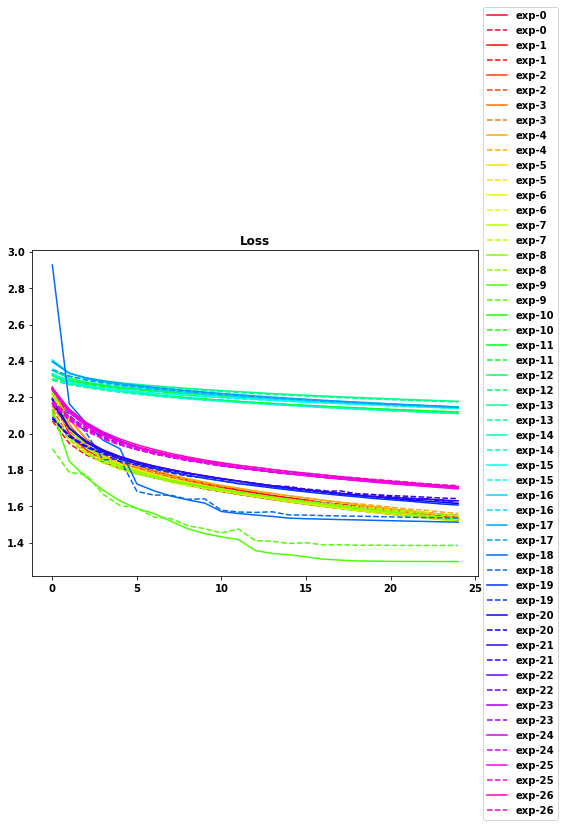

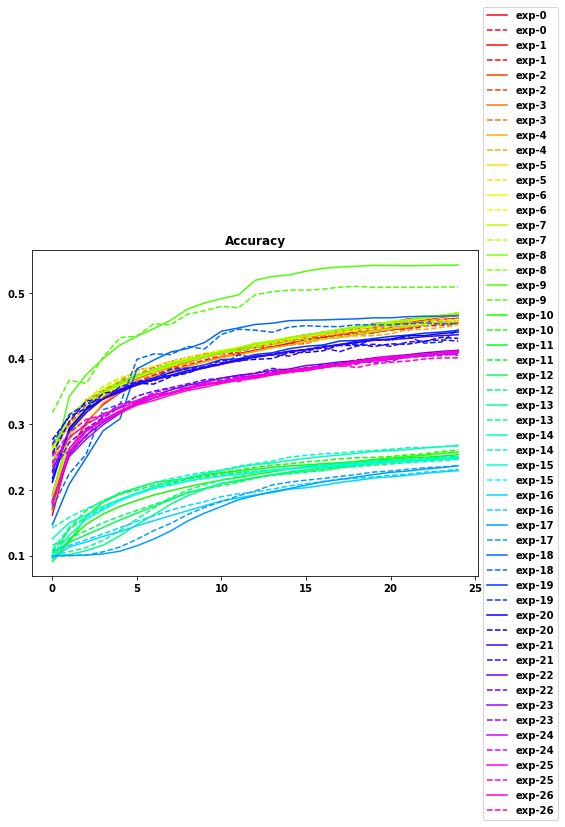

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()